# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split # Importar para possível uso futuro, mas não estritamente para "formato adequado"

# Carregar o dataset
# Assumindo que o arquivo CSV esteja no mesmo diretório ou caminho especificado
try:
    df_california = pd.read_csv('housing.csv')
    print("Dataset 'housing.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    # Exit ou raise para evitar erros subsequentes se o arquivo não for encontrado
    exit()

# 1. Avaliar a estrutura do DataFrame
print("\n--- Primeiras 5 linhas do DataFrame ---")
print(df_california.head())

print("\n--- Informações gerais do DataFrame ---")
df_california.info()

print("\n--- Verificação de valores ausentes ---")
print(df_california.isnull().sum())

# 2. Separar features (X) e target (y)
# A variável target é 'median_house_value'
X = df_california.drop('median_house_value', axis=1)
y = df_california['median_house_value']

print(f"\nVariável Target (y) separada. Formato de y: {y.shape}")
print(f"Features (X) separadas. Formato de X: {X.shape}")

# 3. Verificar o tipo das variáveis categóricas se houverem (e.g., 'ocean_proximity')
# scikit-learn precisa de variáveis numéricas, então categóricas como 'object' precisarão de encoding.
# df.info() já nos deu uma pista.
if 'ocean_proximity' in X.columns and X['ocean_proximity'].dtype == 'object':
    print("\nDetectada variável categórica 'ocean_proximity'. Ela precisará de codificação (e.g., One-Hot Encoding) para o scikit-learn.")
    print("Valores únicos de 'ocean_proximity':", X['ocean_proximity'].unique())

# Verificação final para NaN no target
if y.isnull().sum() > 0:
    print(f"\nATENÇÃO: Valores ausentes detectados na variável target 'median_house_value': {y.isnull().sum()}. Isso precisará ser tratado.")
else:
    print("\nNenhum valor ausente na variável target 'median_house_value'. OK.")

print("\n--- Verificação de formato para Scikit-learn concluída. ---")
print("O dataset está em um formato de DataFrame pandas, que é a base para o scikit-learn.")
print("Pontos importantes para a próxima etapa (modelagem):")
print("- **Tratar valores ausentes:** A coluna 'total_bedrooms' tem valores ausentes que precisarão ser imputados ou removidos.")
print("- **Codificar variáveis categóricas:** A coluna 'ocean_proximity' é do tipo 'object' e precisará ser transformada em numérica (ex: One-Hot Encoding).")
print("Ambos são passos de pré-processamento cruciais antes de treinar o modelo.")

Dataset 'housing.csv' carregado com sucesso!

--- Primeiras 5 linhas do DataFrame ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

Dataset 'housing.csv' carregado com sucesso!

Valores ausentes em 'total_bedrooms' preenchidos com a mediana: 435.0

--- Informações do DataFrame após pré-processamento (todas as colunas numéricas) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  

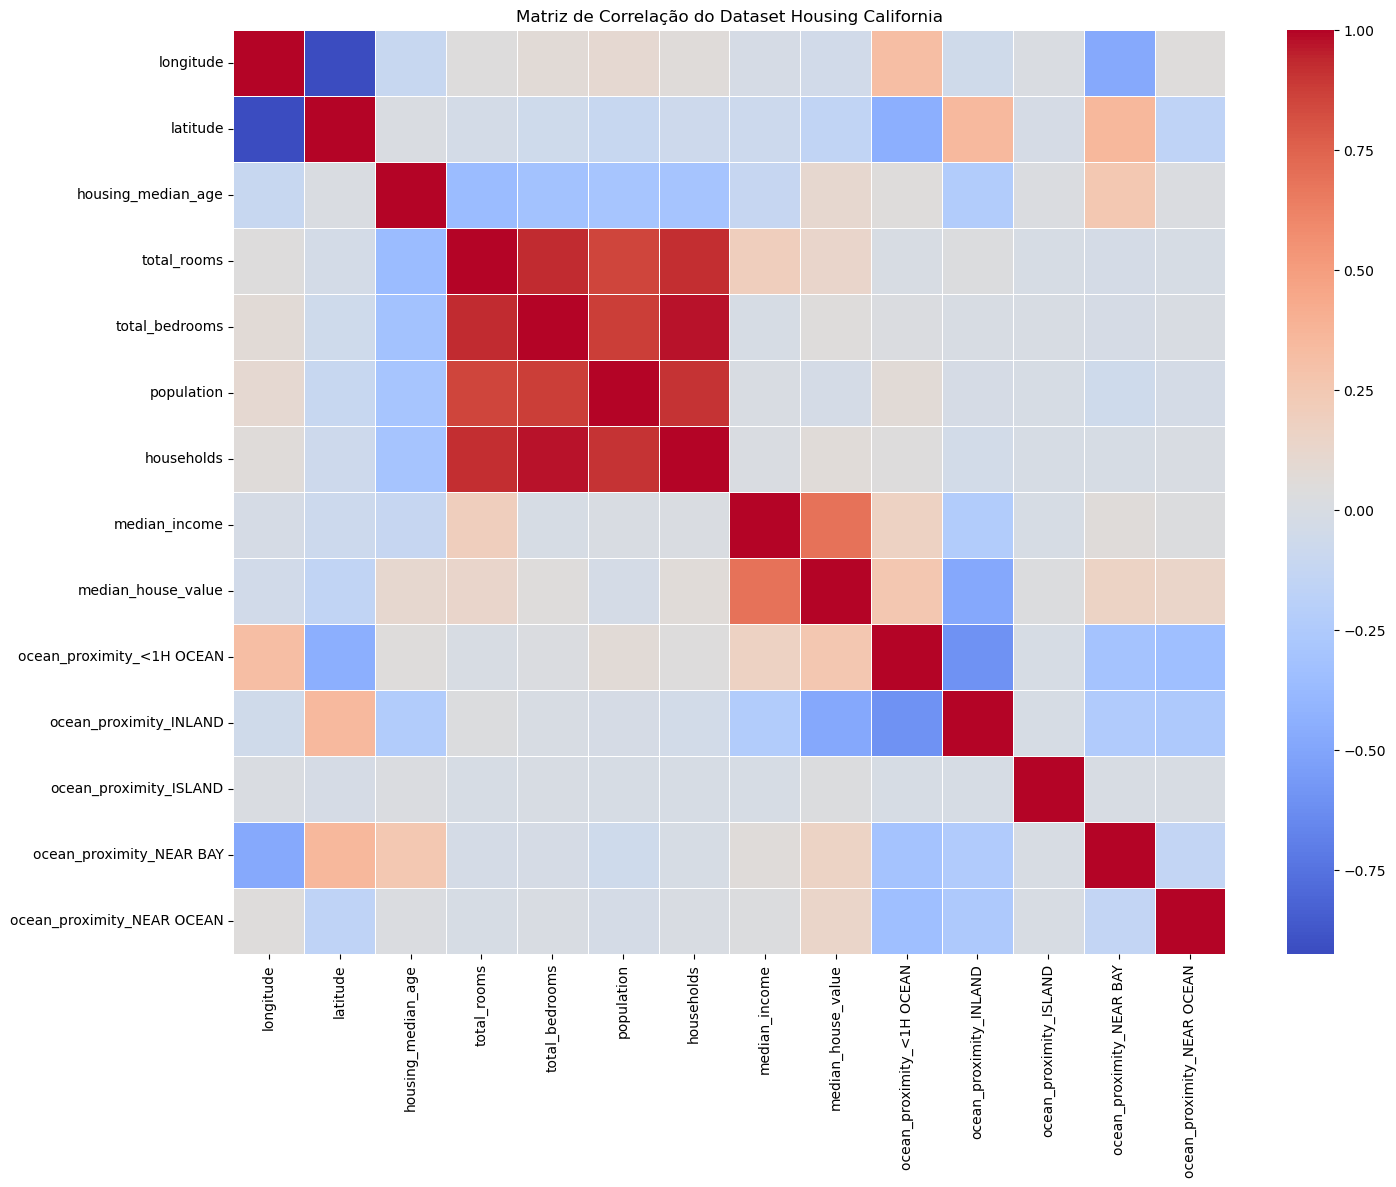


--- Correlação das variáveis com 'median_house_value' (Target) ---
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

--- Análise de Variáveis com Potencial Preditivo ---
Ao observar a matriz de correlação (heatmap) e a lista de correlações com o target, as variáveis com maior potencial preditivo interessante para 'median_house_value' são aquelas com os maiores valores absolutos de correlação (mais próximos de 1 ou -1).

Top 5 variáveis mais positivamente co

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importado para np.median se necessário, embora pd.DataFrame.median() já resolva

# Carregar o dataset
try:
    df_california = pd.read_csv('housing.csv')
    print("Dataset 'housing.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    exit()

# --- Pré-processamento para a Matriz de Correlação ---

# 1. Tratar valores ausentes na coluna 'total_bedrooms'
# Preencher com a mediana é uma estratégia comum e simples para essa tarefa
median_bedrooms = df_california['total_bedrooms'].median()
# CORREÇÃO AQUI: Atribuir o resultado de volta à coluna, em vez de usar inplace=True
df_california['total_bedrooms'] = df_california['total_bedrooms'].fillna(median_bedrooms)
print(f"\nValores ausentes em 'total_bedrooms' preenchidos com a mediana: {median_bedrooms}")

# 2. Codificar a variável categórica 'ocean_proximity' usando One-Hot Encoding
# Isso criará novas colunas (ex: 'ocean_proximity_<1H OCEAN>', 'ocean_proximity_INLAND', etc.)
df_processed = pd.get_dummies(df_california, columns=['ocean_proximity'], drop_first=False)

print("\n--- Informações do DataFrame após pré-processamento (todas as colunas numéricas) ---")
df_processed.info()
print("\nVerificação final de valores ausentes (deve ser 0):", df_processed.isnull().sum().sum())

# --- Calcular e Visualizar a Matriz de Correlação ---

# Calcular a matriz de correlação de todas as variáveis
correlation_matrix = df_processed.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação do Dataset Housing California')
plt.show()

# --- Identificar variáveis com potencial preditivo interessante para 'median_house_value' ---

# Extrair a correlação de todas as variáveis com a 'median_house_value' e ordenar
target_correlation = correlation_matrix['median_house_value'].sort_values(ascending=False)

print("\n--- Correlação das variáveis com 'median_house_value' (Target) ---")
print(target_correlation)

print("\n--- Análise de Variáveis com Potencial Preditivo ---")
print("Ao observar a matriz de correlação (heatmap) e a lista de correlações com o target, as variáveis com maior potencial preditivo interessante para 'median_house_value' são aquelas com os maiores valores absolutos de correlação (mais próximos de 1 ou -1).")

# Filtrar o próprio target da lista e exibir os top 5 positivos e top 5 negativos
top_correlated_pos = target_correlation[target_correlation.index != 'median_house_value'].head(5)
print("\nTop 5 variáveis mais positivamente correlacionadas com 'median_house_value':")
print(top_correlated_pos)

top_correlated_neg = target_correlation[target_correlation.index != 'median_house_value'].sort_values(ascending=True).head(5)
print("\nTop 5 variáveis mais negativamente correlacionadas com 'median_house_value':")
print(top_correlated_neg)

print("\n--- Observações Iniciais ---")
print("Variáveis como 'MedInc' (median income) e algumas das categorias de 'ocean_proximity' (especialmente 'INLAND' com correlação negativa e as costeiras com correlação positiva) geralmente se destacam em datasets de imóveis.")
print("O 'heatmap' visualmente confirma a força e a direção dessas relações.")

### 3. Separe os dados em validação e teste

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # Necessário se for recriar df_processed aqui

# Recarregar e pré-processar o DataFrame para garantir que esteja pronto (mesmos passos da célula anterior)
try:
    df_california = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado.")
    exit()

median_bedrooms = df_california['total_bedrooms'].median()
df_california['total_bedrooms'] = df_california['total_bedrooms'].fillna(median_bedrooms) # Correção inplace=True
df_processed = pd.get_dummies(df_california, columns=['ocean_proximity'], drop_first=False)

# Definir as features (X) e a variável target (y)
X = df_processed.drop('median_house_value', axis=1)
y = df_processed['median_house_value']

# Separar os dados em conjuntos de treino e teste
# Usaremos 80% para treino e 20% para teste (comum)
# random_state garante que a divisão seja a mesma cada vez que você rodar o código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados separados em conjuntos de treino e teste:")
print(f"Shape de X_train (features de treino): {X_train.shape}")
print(f"Shape de y_train (target de treino): {y_train.shape}")
print(f"Shape de X_test (features de teste): {X_test.shape}")
print(f"Shape de y_test (target de teste): {y_test.shape}")

print("\nOs dados estão agora prontos para o treinamento e avaliação do modelo.")

Dados separados em conjuntos de treino e teste:
Shape de X_train (features de treino): (16512, 13)
Shape de y_train (target de treino): (16512,)
Shape de X_test (features de teste): (4128, 13)
Shape de y_test (target de teste): (4128,)

Os dados estão agora prontos para o treinamento e avaliação do modelo.


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np # Necessário para np.median se o df_california for recarregado aqui

# --- Re-carregar e pré-processar o DataFrame para garantir que X_train, y_train, etc., estejam disponíveis ---
# (Este bloco garante que o código seja executável de forma independente, se você executar apenas esta célula)
try:
    df_california = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado.")
    exit()

median_bedrooms = df_california['total_bedrooms'].median()
df_california['total_bedrooms'] = df_california['total_bedrooms'].fillna(median_bedrooms)
df_processed = pd.get_dummies(df_california, columns=['ocean_proximity'], drop_first=False)

X = df_processed.drop('median_house_value', axis=1)
y = df_processed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# --- Fim do bloco de re-carregamento ---

print("--- Treinando Árvores de Regressão ---")

# 1. Treinar a Árvore de Regressão com profundidade máxima = 8
print("\nTreinando a Árvore de Regressão com max_depth = 8...")
dt_reg_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_reg_8.fit(X_train, y_train)
print("Árvore 1 (max_depth=8) treinada com sucesso!")

# 2. Treinar a Árvore de Regressão com profundidade máxima = 2
print("\nTreinando a Árvore de Regressão com max_depth = 2...")
dt_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_reg_2.fit(X_train, y_train)
print("Árvore 2 (max_depth=2) treinada com sucesso!")

print("\nAmbas as árvores foram treinadas e estão prontas para avaliação ou visualização.")

--- Treinando Árvores de Regressão ---

Treinando a Árvore de Regressão com max_depth = 8...
Árvore 1 (max_depth=8) treinada com sucesso!

Treinando a Árvore de Regressão com max_depth = 2...
Árvore 2 (max_depth=2) treinada com sucesso!

Ambas as árvores foram treinadas e estão prontas para avaliação ou visualização.


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error # Importamos a função para calcular o MSE
import numpy as np

# --- Re-carregar e pré-processar o DataFrame e treinar as árvores ---
# Este bloco garante que o código seja executável de forma independente,
# caso você execute apenas esta célula ou esteja retomando a sessão.
try:
    df_california = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    exit()

median_bedrooms = df_california['total_bedrooms'].median()
df_california['total_bedrooms'] = df_california['total_bedrooms'].fillna(median_bedrooms)
df_processed = pd.get_dummies(df_california, columns=['ocean_proximity'], drop_first=False)

X = df_processed.drop('median_house_value', axis=1)
y = df_processed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar as árvores (se já não estiverem treinadas na sessão atual)
dt_reg_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_reg_8.fit(X_train, y_train)

dt_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_reg_2.fit(X_train, y_train)
# --- Fim do bloco de preparação ---

print("--- Calculando MSE para as Árvores de Regressão ---")

# --- Resultados para a Árvore com max_depth = 8 ---
print("\n### Árvore de Regressão: max_depth = 8 ###")

# Fazer previsões na base de TREINAMENTO
y_pred_train_8 = dt_reg_8.predict(X_train)
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
print(f"MSE na base de TREINAMENTO: {mse_train_8:,.2f}") # Formatado para 2 casas decimais e separador de milhares

# Fazer previsões na base de TESTE
y_pred_test_8 = dt_reg_8.predict(X_test)
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)
print(f"MSE na base de TESTE: {mse_test_8:,.2f}")


# --- Resultados para a Árvore com max_depth = 2 ---
print("\n### Árvore de Regressão: max_depth = 2 ###")

# Fazer previsões na base de TREINAMENTO
y_pred_train_2 = dt_reg_2.predict(X_train)
mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
print(f"MSE na base de TREINAMENTO: {mse_train_2:,.2f}")

# Fazer previsões na base de TESTE
y_pred_test_2 = dt_reg_2.predict(X_test)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)
print(f"MSE na base de TESTE: {mse_test_2:,.2f}")

print("\n--- Análise dos Resultados do MSE ---")
print("Observe que o MSE no conjunto de treino geralmente é menor para a árvore mais complexa (max_depth=8), pois ela se ajusta mais aos dados que viu.")
print("No entanto, o MSE no conjunto de teste é a métrica mais importante para avaliar o quão bem o modelo generaliza para dados novos e não vistos.")
print("Um MSE significativamente maior no teste em comparação com o treino pode indicar overfitting (o modelo 'decorou' os dados de treino em vez de aprender as regras gerais).")

--- Calculando MSE para as Árvores de Regressão ---

### Árvore de Regressão: max_depth = 8 ###
MSE na base de TREINAMENTO: 3,253,976,845.99
MSE na base de TESTE: 3,904,405,786.79

### Árvore de Regressão: max_depth = 2 ###
MSE na base de TREINAMENTO: 6,710,572,662.34
MSE na base de TESTE: 6,893,607,949.70

--- Análise dos Resultados do MSE ---
Observe que o MSE no conjunto de treino geralmente é menor para a árvore mais complexa (max_depth=8), pois ela se ajusta mais aos dados que viu.
No entanto, o MSE no conjunto de teste é a métrica mais importante para avaliar o quão bem o modelo generaliza para dados novos e não vistos.
Um MSE significativamente maior no teste em comparação com o treino pode indicar overfitting (o modelo 'decorou' os dados de treino em vez de aprender as regras gerais).


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [20]:
# Com base nesses resultados, a Árvore com max_depth = 8 parece ser a mais adequada.

# A árvore de max_depth=8, apesar de mostrar um pouco mais de overfitting do que a de max_depth=2, oferece uma capacidade preditiva muito superior em dados novos. A árvore de max_depth=2 é excessivamente simples e não consegue fazer previsões precisas. Para uma modelagem, sempre buscamos o modelo que generaliza melhor e tem o menor erro em dados não vistos.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

--- Visualizando a Árvore de Regressão ---

### Visualização da Árvore de Regressão (max_depth=2) ###
Esta árvore é mais simples e fácil de interpretar as regras de decisão.


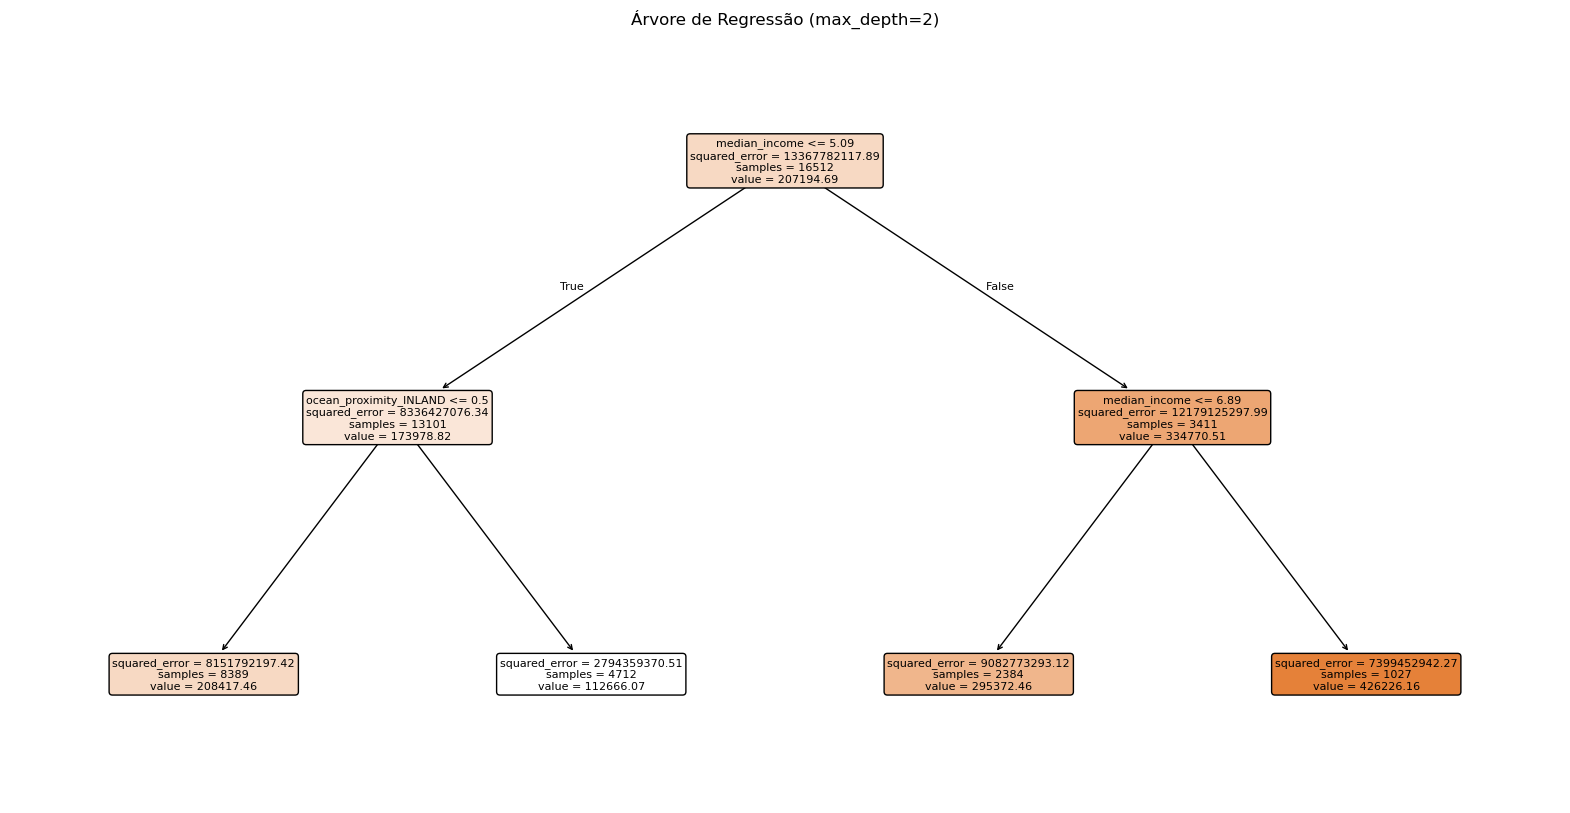


### Visualização da Árvore de Regressão (max_depth=8) ###
ATENÇÃO: Esta árvore é muito complexa devido à sua profundidade (8).
O gráfico abaixo será bastante denso e pode ser difícil de ler sem dar zoom ou salvar em alta resolução.


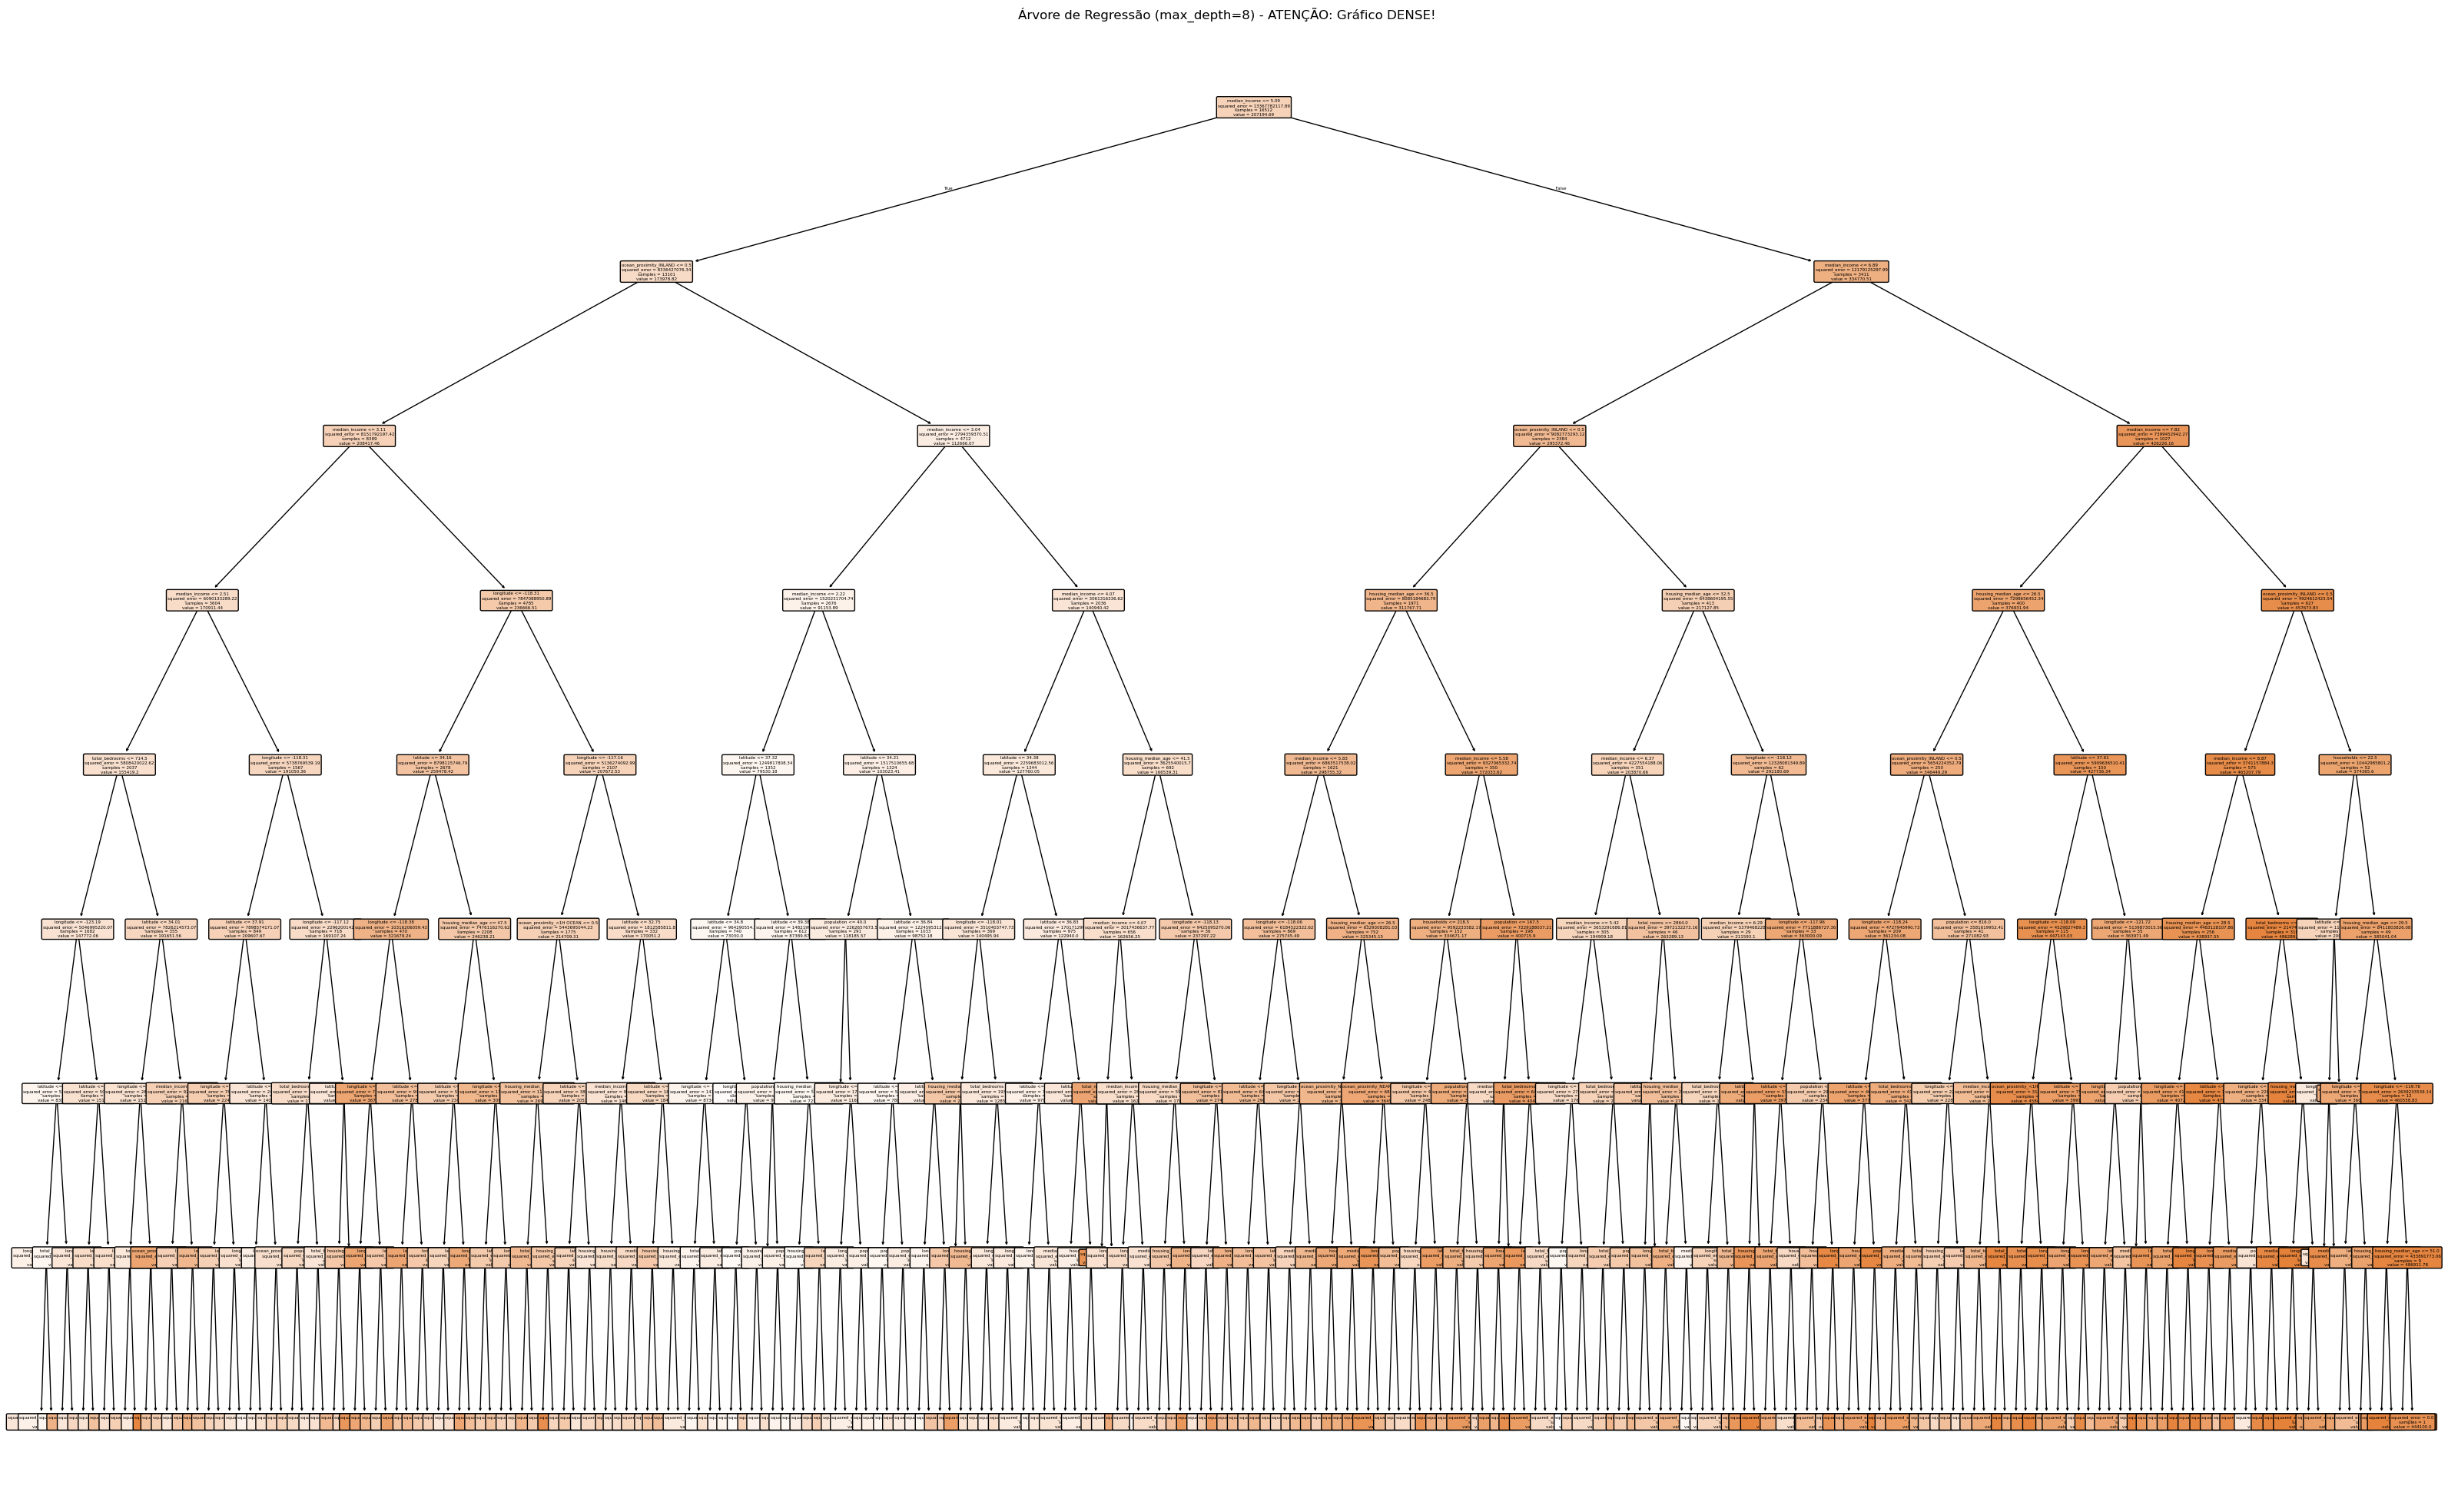


--- Como interpretar cada nó da árvore ---
Em cada nó da árvore, você encontrará as seguintes informações:
1.  **Condição de Divisão:** Por exemplo, `MedInc <= 4.90`. Isso significa que se o valor da variável (MedInc) for menor ou igual a 4.90, as amostras vão para o nó da esquerda; caso contrário, para o nó da direita.
2.  **mse:** O Erro Quadrático Médio dos valores da `median_house_value` para as amostras que caíram naquele nó. Quanto menor, mais homogêneos são os valores de casas naquele grupo.
3.  **samples:** O número de observações (linhas/casas) que chegam naquele nó específico.
4.  **value:** A média da `median_house_value` para todas as amostras que estão naquele nó. Se este for um nó folha (terminal), este será o valor previsto para novas amostras que caírem ali.
Os nós coloridos indicam a média da `median_house_value` (tons mais escuros geralmente para valores mais altos).


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree # Importamos plot_tree
import matplotlib.pyplot as plt
import numpy as np

# --- Re-carregar e pré-processar o DataFrame e treinar as árvores ---
# Este bloco garante que o código seja executável de forma independente,
# caso você esteja retomando a sessão ou execute apenas esta célula.
try:
    df_california = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Erro: 'housing.csv' não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    exit()

median_bedrooms = df_california['total_bedrooms'].median()
df_california['total_bedrooms'] = df_california['total_bedrooms'].fillna(median_bedrooms)
df_processed = pd.get_dummies(df_california, columns=['ocean_proximity'], drop_first=False)

X = df_processed.drop('median_house_value', axis=1)
y = df_processed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar a árvore mais adequada (max_depth=8)
dt_reg_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_reg_8.fit(X_train, y_train)

# Treinar a árvore mais simples (max_depth=2) - útil para visualização didática
dt_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_reg_2.fit(X_train, y_train)
# --- Fim do bloco de preparação ---

print("--- Visualizando a Árvore de Regressão ---")

# --- Visualização da Árvore com max_depth = 2 (mais didática para entender) ---
print("\n### Visualização da Árvore de Regressão (max_depth=2) ###")
print("Esta árvore é mais simples e fácil de interpretar as regras de decisão.")

plt.figure(figsize=(20, 10)) # Aumenta o tamanho da figura para melhor legibilidade
plot_tree(dt_reg_2,
          feature_names=X_train.columns.tolist(), # Nomes das variáveis (features)
          filled=True, # Preenche os nós com cores (mais escuro = maior valor médio)
          rounded=True, # Cantos arredondados para os nós
          fontsize=8, # Tamanho da fonte dos textos nos nós
          precision=2) # Precisão dos valores numéricos exibidos (MSE, value)
plt.title('Árvore de Regressão (max_depth=2)')
plt.show()

# --- Visualização da Árvore com max_depth = 8 (a mais adequada em performance, mas muito densa) ---
print("\n### Visualização da Árvore de Regressão (max_depth=8) ###")

plt.figure(figsize=(40, 25)) # Aumenta bastante o tamanho para tentar acomodar
plot_tree(dt_reg_8,
          feature_names=X_train.columns.tolist(),
          filled=True,
          rounded=True,
          fontsize=4, # Reduz a fonte para tentar caber mais informações
          precision=2)
plt.title('Árvore de Regressão (max_depth=8) - ATENÇÃO: Gráfico DENSE!')
plt.show()

print("\n--- Como interpretar cada nó da árvore ---")
print("1.  **Condição de Divisão:** Por exemplo, `MedInc <= 4.90`. Isso significa que se o valor da variável (MedInc) for menor ou igual a 4.90, as amostras vão para o nó da esquerda; caso contrário, para o nó da direita.")
print("2.  **mse:** O Erro Quadrático Médio dos valores da `median_house_value` para as amostras que caíram naquele nó. Quanto menor, mais homogêneos são os valores de casas naquele grupo.")
print("3.  **samples:** O número de observações (linhas/casas) que chegam naquele nó específico.")
print("4.  **value:** A média da `median_house_value` para todas as amostras que estão naquele nó. Se este for um nó folha (terminal), este será o valor previsto para novas amostras que caírem ali.")
print("Os nós coloridos indicam a média da `median_house_value` (tons mais escuros geralmente para valores mais altos).")

In [24]:
#o que me parece mais importante são as variaveis de valor, ocean proximity e squared error